In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sqlalchemy import create_engine

# Database connection details
server = 'LIMONA\SQLEXPRESS'
database = 'UniFood'
driver = 'ODBC Driver 17 for SQL Server'

# Connection string with Windows Authentication
connection_string = f'mssql+pyodbc://@{server}/{database}?driver={driver}&trusted_connection=yes'

# Creating an engine
engine = create_engine(connection_string)

# SQL query
query = '''SELECT CAST(sched.Date AS DATE) AS [Date],
	   sales.[Total amount],
	   trans.[Count of transactions],
	   sales.[Total amount] / trans.[Count of transactions] AS [Average Bill Amount],
	   SUM([Students registered for the class]) * 0.8 AS [Students_count]
FROM AcadScheduleSpring2024 sched
INNER JOIN (
			SELECT CAST(Date AS DATE) AS [Date],
			SUM([Price]) AS [Total amount]
			FROM SalesUniFood2024
			WHERE [საწყობი] LIKE N'%ჩოლოყაშვილი%'
			AND [გადახდის ტიპი] = N'ნაღდი'
			AND [Product_ID] IN (select [კოდი]
								   from MenuFood
								)
			GROUP BY CAST(Date AS DATE)
		    ) sales ON sales.Date = sched.Date
INNER JOIN (
		    SELECT CAST(Date AS DATE) AS [Date],
				   COUNT([TransactionNumber]) as [Count of transactions]
			FROM Transactions
			WHERE [ბანკი/სალარო] IN (N'სასადილოს სალარო 1- ჩოლოყაშვილი', N'სასადილოს სალარო 2 - ჩოლოყაშვილი')
			GROUP BY CAST(Date AS DATE)
			) trans ON trans.Date = sched.Date
WHERE CAST(SUBSTRING([Starting hour of the class],
					 CHARINDEX(')',[Starting hour of the class]) - 11, 2) AS INT) < 18
	  AND [Starting hour of the class] NOT LIKE N'%კვირა%'
	  AND [Online/Offline] = 'Offline'
	  AND [Building] IN ('E', 'F', 'G', 'H', 'T', 'S')
GROUP BY CAST(sched.Date AS DATE),
		 sales.[Total amount],
		 trans.[Count of transactions]
ORDER BY [Date]
'''

# Loading data into DataFrame
df_uf = pd.read_sql(query, engine)

# Closing the connection
engine.dispose()

# Display the DataFrame
df_uf.head()

,Date,Total amount,Count of transactions,Average Bill Amount,Students_count
0,2024-03-04,2173.372,231,9.408537,11080.8
1,2024-03-05,2252.762,239,9.425782,11816.8
2,2024-03-06,2050.532,238,8.615681,11568.8
3,2024-03-07,2355.226,267,8.821071,11921.6
4,2024-03-09,988.006,128,7.718797,10060.8


In [9]:
# Importing weather data from excel file
df_weather = pd.read_excel('C:\\Users\\User\\Desktop\\UniFood2024\\exportWeather.xlsx')

In [37]:
# Converting date columns of df_uf and df_weather to make sure they are same
df_uf['Date'] = pd.to_datetime(df_uf['Date'])
df_weather['Date'] = pd.to_datetime(df_weather['Date'])

In [16]:
# Selecting and renaming only the necessary columns from df_weather
df_weather_dailyavgtemperature = df_weather[['Date', 'tavg']]
df_weather_dailyavgtemperature = df_weather_dailyavgtemperature.rename(columns = {'tavg': 'Average Temperature'})

In [17]:
# Merging DataFrames on the date column
df = pd.merge(df_uf, df_weather_dailyavgtemperature, on = 'Date', how = 'inner')
df.head()

,Date,Total amount,Count of transactions,Average Bill Amount,Students_count,Average Temperature
0,2024-03-04,2173.372,231,9.408537,11080.8,6.0
1,2024-03-05,2252.762,239,9.425782,11816.8,8.1
2,2024-03-06,2050.532,238,8.615681,11568.8,8.1
3,2024-03-07,2355.226,267,8.821071,11921.6,7.5
4,2024-03-09,988.006,128,7.718797,10060.8,5.9


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65 entries, 0 to 64
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Date                   65 non-null     datetime64[ns]
 1   Total amount           65 non-null     float64       
 2   Count of transactions  65 non-null     int64         
 3   Average Bill Amount    65 non-null     float64       
 4   Students_count         65 non-null     float64       
 5   Average Temperature    65 non-null     float64       
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 3.2 KB


In [19]:
df.describe()

,Date,Total amount,Count of transactions,Average Bill Amount,Students_count,Average Temperature
count,65,65.000000,65.000000,65.000000,65.000000,65.000000
mean,2024-04-14 05:10:09.230769152,1918.643169,228.476923,8.338546,11239.827692,13.967692
min,2024-03-04 00:00:00,882.646000,105.000000,6.129486,9953.600000,5.100000
25%,2024-03-23 00:00:00,1705.910000,200.000000,7.754136,10855.200000,8.100000
50%,2024-04-12 00:00:00,2032.704000,246.000000,8.451477,11338.400000,14.700000
75%,2024-05-01 00:00:00,2311.688000,261.000000,8.911944,11816.800000,18.900000
max,2024-05-31 00:00:00,2736.414000,310.000000,10.626256,12177.600000,22.100000
std,NaN,502.524098,50.452362,0.883176,655.549258,5.365081


In [20]:
df.columns

Index(['Date', 'Total amount', 'Count of transactions', 'Average Bill Amount',
       'Students_count', 'Average Temperature'],
      dtype='object')

C:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating ins

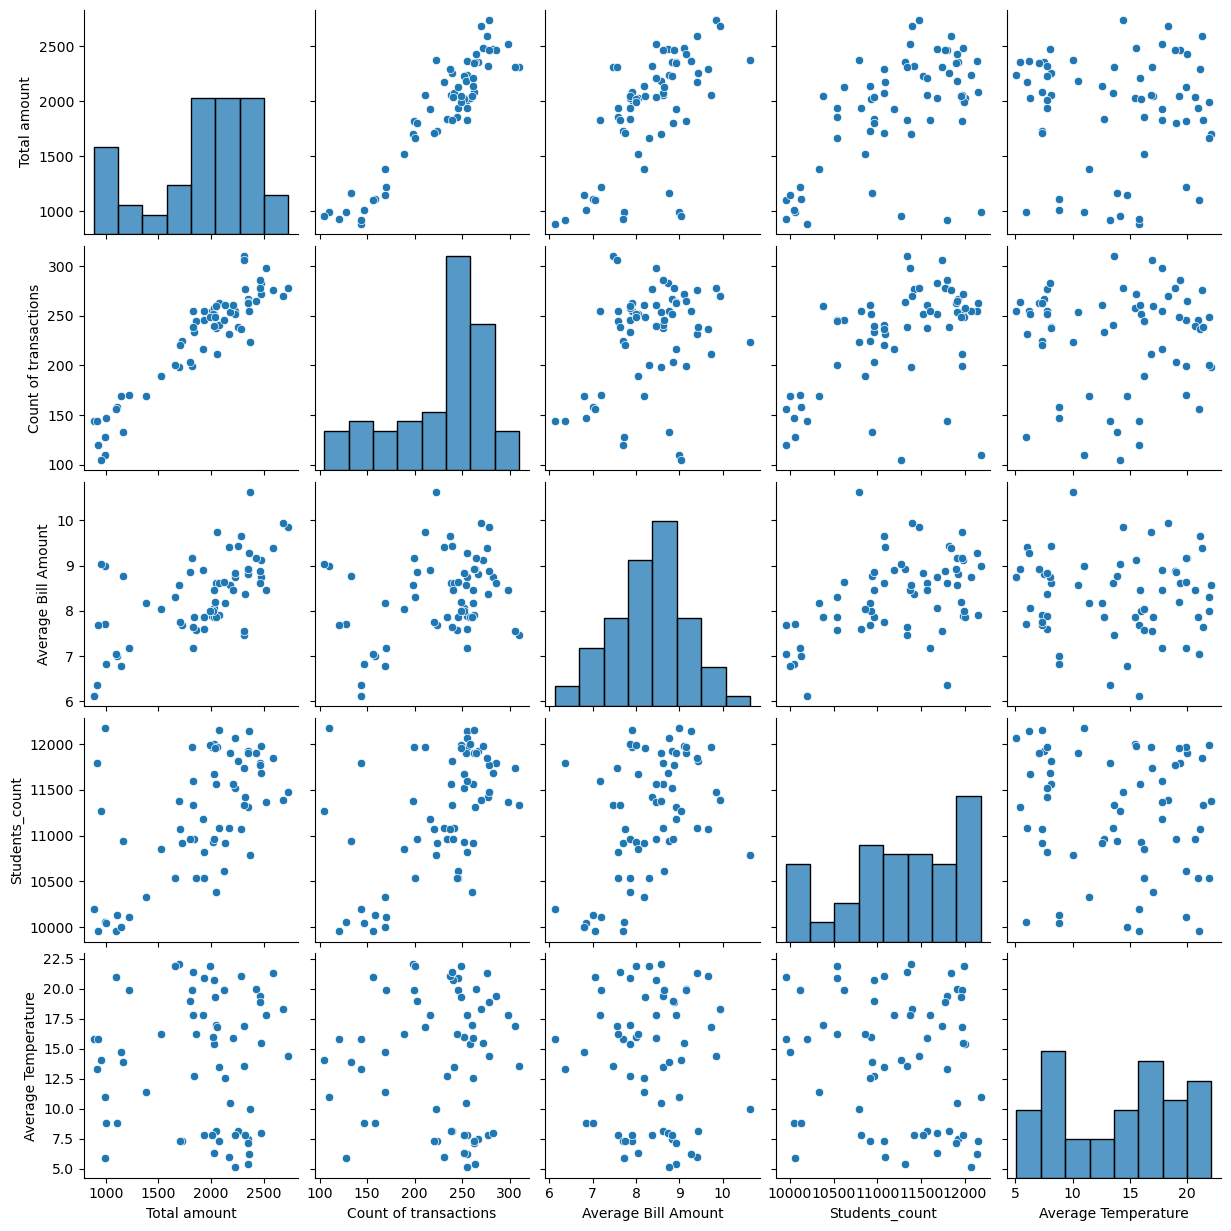

In [21]:
sns.pairplot(df)

C:\Users\User\AppData\Local\Temp\ipykernel_21060\2420388705.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Total amount'])
C:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Total amount', ylabel='Density'>

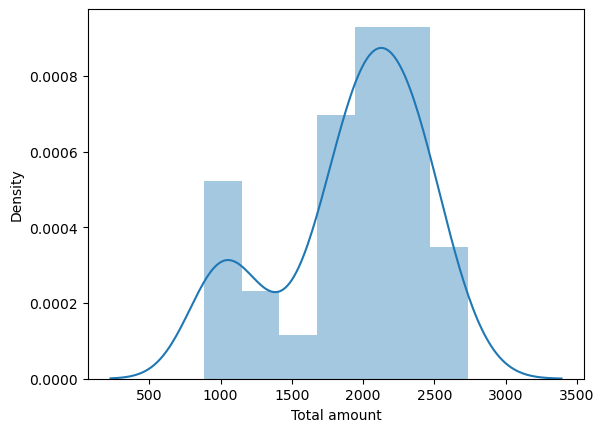

In [22]:
sns.distplot(df['Total amount'])

<Axes: >

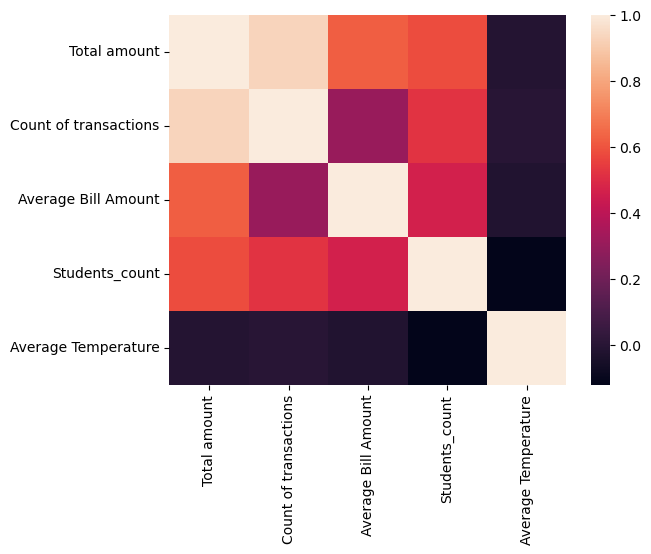

In [23]:
df_without_date = df.drop(['Date'], axis = 1)
sns.heatmap(df_without_date.corr())

### Training a linear regression model

In [24]:
X = df[['Count of transactions', 'Average Bill Amount', 'Students_count', 'Average Temperature']]
y = df['Total amount']

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 5)

### Creating and training the model

In [27]:
from sklearn.linear_model import LinearRegression

In [28]:
lm = LinearRegression()

In [29]:
lm.fit(X_train, y_train)

LinearRegression()

### Model evaluation (checking coefficients)

In [30]:
print(lm.intercept_)

-1746.773676898294


In [31]:
coeff_df = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
Count of transactions,7.703333
Average Bill Amount,218.937567
Students_count,0.008090
Average Temperature,-0.479009


### Predictions from the model

In [32]:
predictions = lm.predict(X_test)

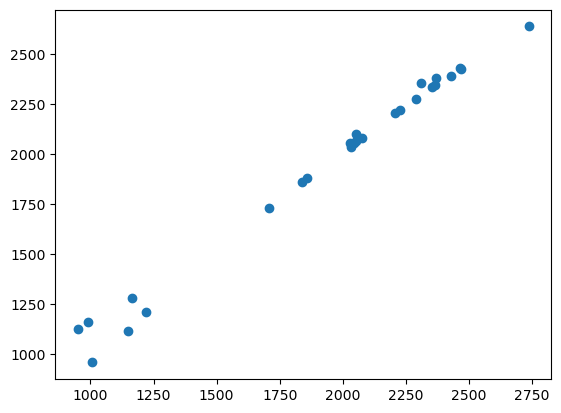

In [33]:
plt.scatter(y_test, predictions)

C:\Users\User\AppData\Local\Temp\ipykernel_21060\555796021.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((y_test - predictions), bins = 10)
C:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Total amount', ylabel='Density'>

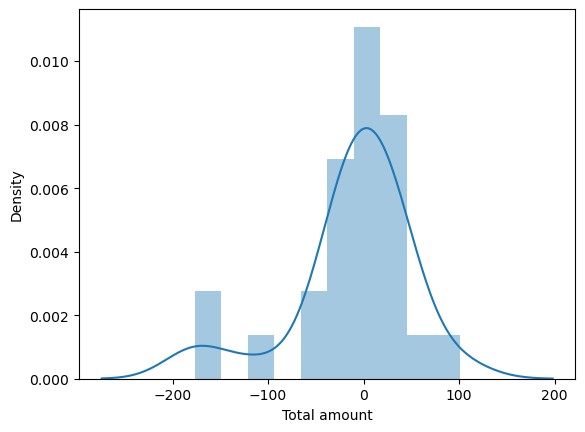

In [34]:
sns.distplot((y_test - predictions), bins = 10)

In [35]:
from sklearn import metrics

In [36]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 40.726521387712985
MSE: 3837.227673359449
RMSE: 61.94536038606482


In [44]:
prediction_data = pd.DataFrame({'Count of transactions': [280], 'Average Bill Amount': [8.5], 'Students_count': [11800], 'Average Temperature': [31]})
predicted_total_amount = lm.predict(prediction_data)
print(f'Predicted sales: {predicted_total_amount[0]}')

Predicted sales: 2351.7424906720953
